In [162]:
import os
import numpy as np
import pandas as pd

Evaluate date dumps to see if system clock is jumping around.

Input: timestamps every 100ms (approx.), obtained by

    ssh-cluster -i -o bigdata/raphael/testbed/nodes_timedump_ntpoff 'for i in seq {1..600}; do date --iso-8601=ns; sleep .1; done'
    
where `ssh-cluster` is an alias

    ssh-cluster='parallel-ssh -h /home/nuc/bigdata/raphael/hosts'

In [163]:
os.listdir('nodes_timedump_before')

['ubuntu@192.168.11.133',
 'ubuntu@192.168.11.123',
 'ubuntu@192.168.11.125',
 'ubuntu@192.168.11.129',
 'ubuntu@192.168.11.138',
 'ubuntu@192.168.11.131',
 'ubuntu@192.168.11.139',
 'ubuntu@192.168.11.132',
 'ubuntu@192.168.11.122',
 'ubuntu@192.168.11.126',
 'ubuntu@192.168.11.128',
 'ubuntu@192.168.11.137',
 'ubuntu@192.168.11.121',
 'ubuntu@192.168.11.134',
 'ubuntu@192.168.11.127',
 'ubuntu@192.168.11.136',
 'ubuntu@192.168.11.130',
 'ubuntu@192.168.11.140',
 'ubuntu@192.168.11.135',
 'ubuntu@192.168.11.124']

In [164]:
ip_addresses = [
    '192.168.11.{}'.format(s) for s in range(121,141)
]

def readfile(f):
    with open(f) as fd:
        contents = fd.readlines()
    return contents

filecontents = {
    ip: readfile('nodes_timedump_before/ubuntu@'+ip) for ip in ip_addresses
    #ip: readfile('nodes_timedump_ntpoff/ubuntu@'+ip) for ip in ip_addresses
}

In [165]:
import dateutil.parser
timestamps_parsed = {
    ip: [
        dateutil.parser.parse(line.rstrip())
        for line in lines
    ]
    for ip, lines in filecontents.items()
}

#timestamps_parsed

In [166]:
max(timestamps_parsed['192.168.11.123'])

datetime.datetime(2018, 5, 7, 8, 20, 34, 75766, tzinfo=tzoffset(None, 7200))

In [167]:
maxlen = max((len(list_) for list_ in timestamps_parsed.values()))
#print(maxlen)
timestamps_parsed_padded = {
    ip: np.pad(np.array(list_),(0,maxlen-len(list_)),'constant',constant_values=(np.nan,))
    #ip: np.array(list_+[max(list_)]*(maxlen-len(list_)))
    for ip, list_ in timestamps_parsed.items()
}
#[len(list_) for list_ in timestamps_parsed_padded.values()]

In [168]:
timestamps_df = pd.DataFrame(timestamps_parsed_padded)

In [169]:
timestamps_df

192.168.11.121                   192.168.11.122  \
0   2018-05-07 08:19:33.552131+02:00 2018-05-07 08:19:34.769337+02:00   
1   2018-05-07 08:19:33.662346+02:00 2018-05-07 08:19:34.881800+02:00   
2   2018-05-07 08:19:33.767188+02:00 2018-05-07 08:19:34.995010+02:00   
3   2018-05-07 08:19:33.871584+02:00 2018-05-07 08:19:35.106201+02:00   
4   2018-05-07 08:19:33.976070+02:00 2018-05-07 08:19:35.218075+02:00   
5   2018-05-07 08:19:34.080824+02:00 2018-05-07 08:19:35.330595+02:00   
6   2018-05-07 08:19:34.185239+02:00 2018-05-07 08:19:35.443120+02:00   
7   2018-05-07 08:19:34.289492+02:00 2018-05-07 08:19:35.557358+02:00   
8   2018-05-07 08:19:34.393982+02:00 2018-05-07 08:19:35.669261+02:00   
9   2018-05-07 08:19:34.498558+02:00 2018-05-07 08:19:35.781665+02:00   
10  2018-05-07 08:19:34.602930+02:00 2018-05-07 08:19:35.893838+02:00   
11  2018-05-07 08:19:34.707434+02:00 2018-05-07 08:19:36.006335+02:00   
12  2018-05-07 08:19:34.811997+02:00 2018-05-07 08:19:36.119162+02:00   
13  2018-05-07 08:19:34.916089+02:00 2018-05-07 08:19:36.230946+02:00   
14  2018-05-07 08:19:35.020669+02:00 2018-05-07 08:19:36.342760+02:00   
15  2018-05-07 08:19:35.125364+02:00 2018-05-07 08:19:36.449513+02:00   
16  2018-05-07 08:19:35.229966+02:00 2018-05-07 08:19:36.557653+02:00   
17  2018-05-07 08:19:35.334164+02:00 2018-05-07 08:19:36.671535+02:00   
18  2018-05-07 08:19:35.438322+02:00 2018-05-07 08:19:36.784595+02:00   
19  2018-05-07 08:19:35.542551+02:00 2018-05-07 08:19:36.897218+02:00   
20  2018-05-07 08:19:35.646968+02:00 2018-05-07 08:19:37.005657+02:00   
21  2018-05-07 08:19:35.751192+02:00 2018-05-07 08:19:37.117936+02:00   
22  2018-05-07 08:19:35.855637+02:00 2018-05-07 08:19:37.228084+02:00   
23  2018-05-07 08:19:35.960165+02:00 2018-05-07 08:19:37.340920+02:00   
24  2018-05-07 08:19:36.064673+02:00 2018-05-07 08:19:37.451860+02:00   
25  2018-05-07 08:19:36.169480+02:00 2018-05-07 08:19:37.565816+02:00   
26  2018-05-07 08:19:36.274145+02:00 2018-05-07 08:19:37.678643+02:00   
27  2018-05-07 08:19:36.378888+02:00 2018-05-07 08:19:37.788043+02:00   
28  2018-05-07 08:19:36.483494+02:00 2018-05-07 08:19:37.897665+02:00   
29  2018-05-07 08:19:36.587900+02:00 2018-05-07 08:19:38.010107+02:00   
..                               ...                              ...   
562 2018-05-07 08:20:32.244150+02:00 2018-05-07 08:20:31.706920+02:00   
563 2018-05-07 08:20:32.348286+02:00 2018-05-07 08:20:31.818937+02:00   
564 2018-05-07 08:20:32.452765+02:00 2018-05-07 08:20:31.931686+02:00   
565 2018-05-07 08:20:32.557170+02:00 2018-05-07 08:20:32.046356+02:00   
566 2018-05-07 08:20:32.661666+02:00 2018-05-07 08:20:32.157840+02:00   
567 2018-05-07 08:20:32.765970+02:00 2018-05-07 08:20:32.269710+02:00   
568 2018-05-07 08:20:32.870500+02:00 2018-05-07 08:20:32.383177+02:00   
569 2018-05-07 08:20:32.975071+02:00 2018-05-07 08:20:32.496380+02:00   
570 2018-05-07 08:20:33.079517+02:00 2018-05-07 08:20:32.607200+02:00   
571 2018-05-07 08:20:33.184119+02:00 2018-05-07 08:20:32.720015+02:00   
572                              NaT 2018-05-07 08:20:32.831739+02:00   
573                              NaT 2018-05-07 08:20:32.944764+02:00   
574                              NaT 2018-05-07 08:20:33.058679+02:00   
575                              NaT 2018-05-07 08:20:33.170158+02:00   
576                              NaT 2018-05-07 08:20:33.282059+02:00   
577                              NaT 2018-05-07 08:20:33.393847+02:00   
578                              NaT 2018-05-07 08:20:33.507526+02:00   
579                              NaT 2018-05-07 08:20:33.617667+02:00   
580                              NaT 2018-05-07 08:20:33.729978+02:00   
581                              NaT 2018-05-07 08:20:33.841883+02:00   
582                              NaT 2018-05-07 08:20:33.954510+02:00   
583                              NaT 2018-05-07 08:20:34.065986+02:00   
584                              NaT 2018-05-07 08:20:34.178089+02:00   
585    

2018-05-07 06:19:33.552131
2018-05-07 06:20:34.970949


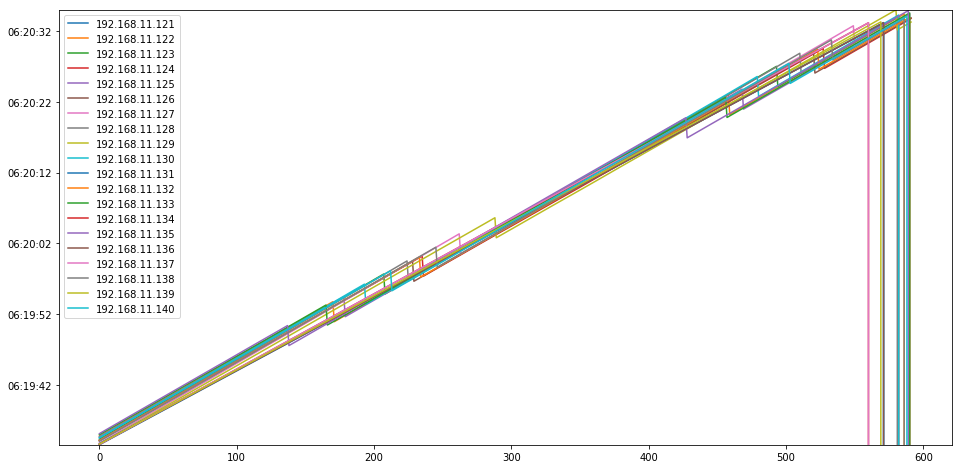

In [170]:
print(min(timestamps_df.min()))
print(max(timestamps_df.max()))
timestamps_df.plot(figsize=(16,8), ylim=(min(timestamps_df.min()),max(timestamps_df.max())))

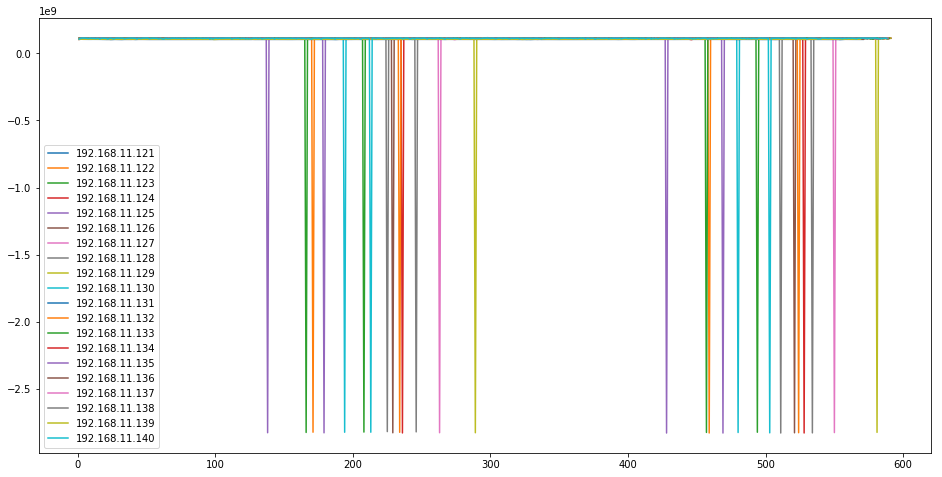

In [171]:
timestamps_df_diff = pd.DataFrame(
    {
        ip: timestamps_df[ip].diff()
        for ip in timestamps_df
    }
)
timestamps_df_diff.plot(figsize=(16,8))

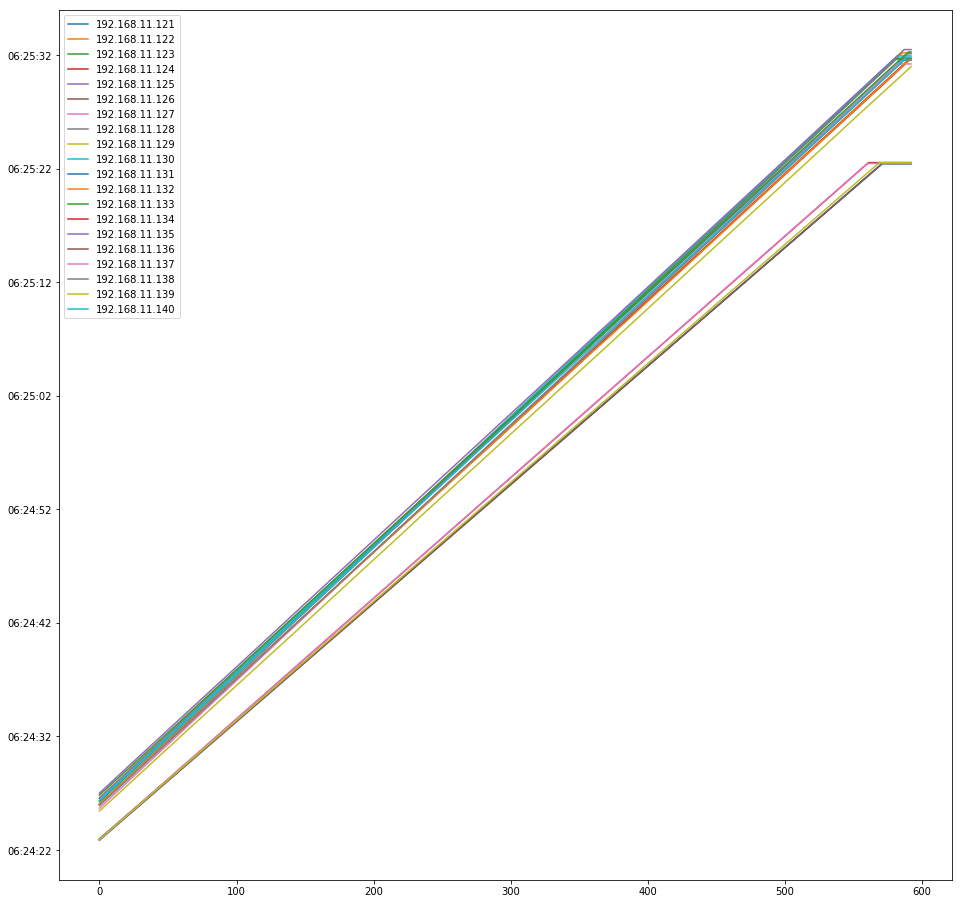

In [172]:
ip_addresses = [
    '192.168.11.{}'.format(s) for s in range(121,141)
]
filecontents = {
    ip: readfile('nodes_timedump_ntpoff/ubuntu@'+ip) for ip in ip_addresses
}
timestamps_parsed = {
    ip: [
        dateutil.parser.parse(line.rstrip())
        for line in lines
    ]
    for ip, lines in filecontents.items()
}
maxlen = max((len(list_) for list_ in timestamps_parsed.values()))
timestamps_parsed_padded = {
    ip: np.array(list_+[max(list_)]*(maxlen-len(list_)))
    for ip, list_ in timestamps_parsed.items()
}
timestamps_df = pd.DataFrame(timestamps_parsed_padded)
timestamps_df.plot(figsize=(16,16))

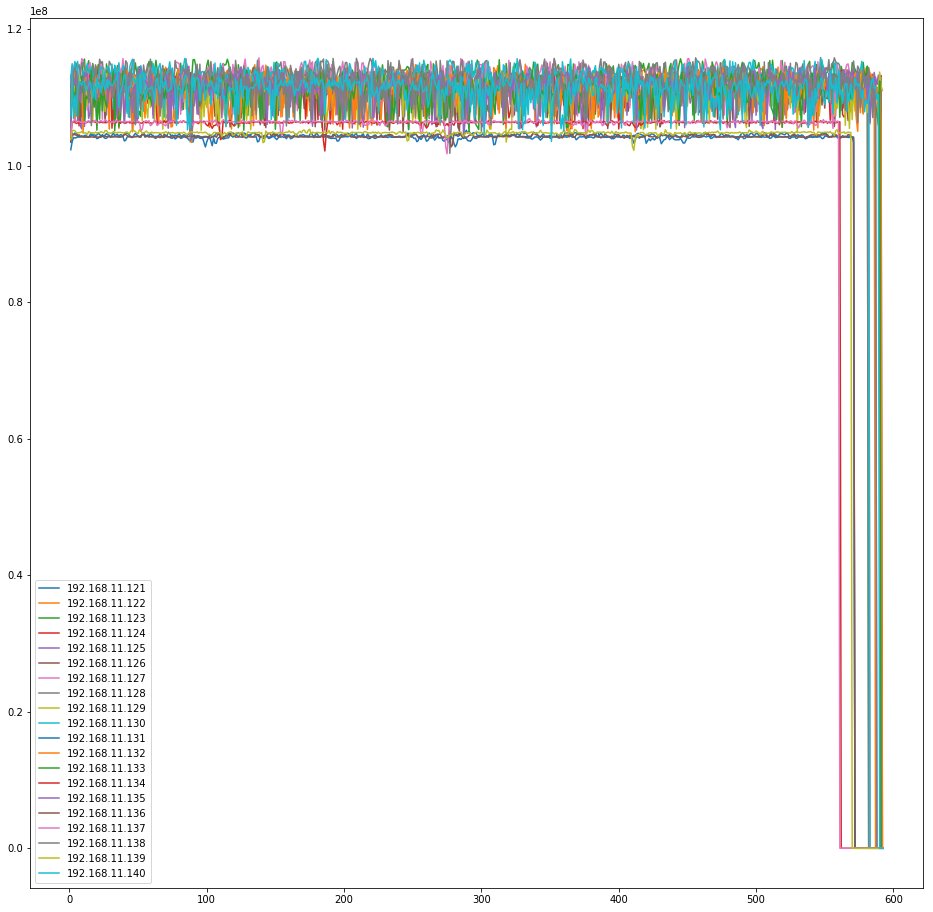

In [173]:
timestamps_df_diff = pd.DataFrame(
    {
        ip: timestamps_df[ip].diff()
        for ip in timestamps_df
    }
)
timestamps_df_diff.plot(figsize=(16,16))